<a href="https://colab.research.google.com/github/Luigson/Minicurso-ciencia-de-dados/blob/main/Dia_4_Testes_e_Hipoteses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)
#importar dados
df1 = pd.read_csv('turmas-2023.1.csv', sep=';', index_col=None)
df2 = pd.read_csv('turmas-2023.2.csv', sep=';', index_col=None)
df3 = pd.read_csv('turmas-2024-1.csv', sep=';', index_col=None)
df4 = pd.read_csv('turmas-2024-2.csv', sep=';', index_col=None)

# Concatenar tudo em um único DataFrame
df_total = pd.concat([df1, df2, df3, df4], ignore_index=True)
display(df_total)

,id_turma,codigo_turma,siape,matricula_docente_externo,observacao,id_componente_curricular,ch_dedicada_periodo,nivel_ensino,campus_turma,local,ano,periodo,data_inicio,data_fim,descricao_horario,total_solicitacoes,capacidade_aluno,tipo,distancia,data_consolidacao,agrupadora,id_turma_agrupadora,qtd_aulas_lancadas,situacao_turma,convenio,modalidade_participantes
0,57711864,01,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala 03,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,4T4 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:59:04.285000000,False,NaN,0.0,CONSOLIDADA,NaN,Presencial
1,57711865,02,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala 03,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,2T3 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:53:20.671000000,False,NaN,13.0,CONSOLIDADA,NaN,Presencial
2,57711866,03,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala E,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,6T4 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:57:36.425000000,False,NaN,11.0,CONSOLIDADA,NaN,Presencial
3,57711867,01,1812476.0,NaN,NaN,69289,15,TÉCNICO,NaN,Sala 13,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,3T1 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/10 09:14:34.285000000,False,NaN,18.0,CONSOLIDADA,NaN,Presencial
4,57711868,02,1812476.0,NaN,NaN,69289,15,TÉCNICO,NaN,Sala 13,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,3T2 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/10 09:13:43.535000000,False,NaN,18.0,CONSOLIDADA,NaN,Presencial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60111,57759627,01,3063244.0,NaN,NaN,80141,30,STRICTO SENSU,NaN,ICe Sala 0.16,2024,2,2024/10/07 00:00:00.000,2024/10/18 00:00:00.000,23456N123 (07/10/2024 - 18/10/2024),0.0,5.0,REGULAR,False,NaN,False,NaN,NaN,EXCLUÍDA,NaN,Presencial
60112,57760115,01,2370473.0,NaN,NaN,81488,30,TÉCNICO,NaN,Veterinária,2024,2,2024/09/16 00:00:00.000,2025/01/30 00:00:00.000,2M12 (16/09/2024 - 30/01/2025),NaN,30.0,REGULAR,False,2025/03/07 10:31:15.291000000,False,NaN,0.0,CONSOLIDADA,NaN,Presencial
60113,57760258,01,NaN,83630.0,NaN,78793,12,LATO SENSU,NaN,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024/12/17 00:00:00.000,2024/12/18 00:00:00.000,34M2345 3T2345 (17/12/2024 - 18/12/2024),NaN,45.0,REGULAR,False,NaN,False,NaN,NaN,ABERTA,NaN,Presencial
60114,57760259,02,NaN,83631.0,NaN,78793,12,LATO SENSU,NaN,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024/12/17 00:00:00.000,2024/12/18 00:00:00.000,34M2345 3T2345 (17/12/2024 - 18/12/2024),NaN,45.0,REGULAR,False,NaN,False,NaN,NaN,ABERTA,NaN,Presencial


In [2]:
# Visão geral
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60116 entries, 0 to 60115
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_turma                   60116 non-null  int64  
 1   codigo_turma               60116 non-null  object 
 2   siape                      58785 non-null  float64
 3   matricula_docente_externo  1330 non-null   float64
 4   observacao                 1727 non-null   object 
 5   id_componente_curricular   60116 non-null  int64  
 6   ch_dedicada_periodo        60116 non-null  int64  
 7   nivel_ensino               60116 non-null  object 
 8   campus_turma               47449 non-null  object 
 9   local                      59773 non-null  object 
 10  ano                        60116 non-null  int64  
 11  periodo                    60116 non-null  int64  
 12  data_inicio                60116 non-null  object 
 13  data_fim                   60116 non-null  obj

In [3]:
#5 primeiras linhas
df_total.head()

,id_turma,codigo_turma,siape,matricula_docente_externo,observacao,id_componente_curricular,ch_dedicada_periodo,nivel_ensino,campus_turma,local,ano,periodo,data_inicio,data_fim,descricao_horario,total_solicitacoes,capacidade_aluno,tipo,distancia,data_consolidacao,agrupadora,id_turma_agrupadora,qtd_aulas_lancadas,situacao_turma,convenio,modalidade_participantes
0,57711864,01,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala 03,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,4T4 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:59:04.285000000,False,NaN,0.0,CONSOLIDADA,NaN,Presencial
1,57711865,02,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala 03,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,2T3 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:53:20.671000000,False,NaN,13.0,CONSOLIDADA,NaN,Presencial
2,57711866,03,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala E,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,6T4 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:57:36.425000000,False,NaN,11.0,CONSOLIDADA,NaN,Presencial
3,57711867,01,1812476.0,NaN,NaN,69289,15,TÉCNICO,NaN,Sala 13,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,3T1 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/10 09:14:34.285000000,False,NaN,18.0,CONSOLIDADA,NaN,Presencial
4,57711868,02,1812476.0,NaN,NaN,69289,15,TÉCNICO,NaN,Sala 13,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,3T2 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/10 09:13:43.535000000,False,NaN,18.0,CONSOLIDADA,NaN,Presencial


In [4]:
#Descrição
df_total.describe(include='all')

,id_turma,codigo_turma,siape,matricula_docente_externo,observacao,id_componente_curricular,ch_dedicada_periodo,nivel_ensino,campus_turma,local,ano,periodo,data_inicio,data_fim,descricao_horario,total_solicitacoes,capacidade_aluno,tipo,distancia,data_consolidacao,agrupadora,id_turma_agrupadora,qtd_aulas_lancadas,situacao_turma,convenio,modalidade_participantes
count,6.011600e+04,60116,5.878500e+04,1330.000000,1727,6.011600e+04,60116.000000,60116,47449,59773,60116.000000,60116.000000,60116,60116,58402,54283.000000,59890.000000,60116,60116,56838,60116,2.376000e+03,56680.000000,60116,0.0,60116
unique,NaN,213,NaN,NaN,945,NaN,NaN,5,5,4796,NaN,NaN,572,656,8583,NaN,NaN,3,2,32926,1,NaN,NaN,4,NaN,2
top,NaN,01,NaN,NaN,Esta turma é destinada aos alunos do curso de ...,NaN,NaN,GRADUAÇÃO,Campus Central,HUOL,NaN,NaN,2024/09/16 00:00:00.000,2024/07/06 00:00:00.000,3T1234,NaN,NaN,REGULAR,False,2025/01/29 11:34:26.866000000,False,NaN,NaN,CONSOLIDADA,NaN,Presencial
freq,NaN,27752,NaN,NaN,40,NaN,NaN,48122,38703,4093,NaN,NaN,9632,9091,629,NaN,NaN,59309,59081,33,60116,NaN,NaN,56954,NaN,59084
mean,5.773111e+07,NaN,2.221637e+06,50359.935338,NaN,1.705349e+05,29.507718,NaN,NaN,NaN,2023.497139,1.495226,NaN,NaN,NaN,17.822246,24.342712,NaN,NaN,NaN,NaN,5.772954e+07,91.466937,NaN,NaN,NaN
std,1.112257e+04,NaN,1.137572e+06,34927.064703,NaN,4.539591e+05,23.990604,NaN,NaN,NaN,0.499996,0.499981,NaN,NaN,NaN,22.652397,28.594672,NaN,NaN,NaN,NaN,1.149284e+04,94.803789,NaN,NaN,NaN
min,5.771186e+07,NaN,1.274600e+04,310.000000,NaN,1.865100e+04,0.000000,NaN,NaN,NaN,2023.000000,1.000000,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,5.771221e+07,0.000000,NaN,NaN,NaN
25%,5.772183e+07,NaN,1.326629e+06,7815.250000,NaN,5.685100e+04,10.000000,NaN,NaN,NaN,2023.000000,1.000000,NaN,NaN,NaN,4.000000,6.000000,NaN,NaN,NaN,NaN,5.771781e+07,36.000000,NaN,NaN,NaN
50%,5.773117e+07,NaN,2.075402e+06,72071.000000,NaN,6.334000e+04,24.000000,NaN,NaN,NaN,2023.000000,1.000000,NaN,NaN,NaN,9.000000,17.000000,NaN,NaN,NaN,NaN,5.772861e+07,68.000000,NaN,NaN,NaN
75%,5.774106e+07,NaN,3.050287e+06,81986.000000,NaN,7.159300e+04,60.000000,NaN,NaN,NaN,2024.000000,2.000000,NaN,NaN,NaN,26.000000,40.000000,NaN,NaN,NaN,NaN,5.773832e+07,80.000000,NaN,NaN,NaN


In [5]:
df_total.isnull().sum()

,0
id_turma,0
codigo_turma,0
siape,1331
matricula_docente_externo,58786
observacao,58389
id_componente_curricular,0
ch_dedicada_periodo,0
nivel_ensino,0
campus_turma,12667
local,343


In [6]:
#Quais são colunas
df_total.columns

Index(['id_turma', 'codigo_turma', 'siape', 'matricula_docente_externo',
       'observacao', 'id_componente_curricular', 'ch_dedicada_periodo',
       'nivel_ensino', 'campus_turma', 'local', 'ano', 'periodo',
       'data_inicio', 'data_fim', 'descricao_horario', 'total_solicitacoes',
       'capacidade_aluno', 'tipo', 'distancia', 'data_consolidacao',
       'agrupadora', 'id_turma_agrupadora', 'qtd_aulas_lancadas',
       'situacao_turma', 'convenio', 'modalidade_participantes'],
      dtype='object')

In [7]:
#Apagar colunas não aproveitáveis

#Apagar coluna convênio (totalmente vazia)
df_total = df_total.drop('convenio', axis=1)

display(df_total)

,id_turma,codigo_turma,siape,matricula_docente_externo,observacao,id_componente_curricular,ch_dedicada_periodo,nivel_ensino,campus_turma,local,ano,periodo,data_inicio,data_fim,descricao_horario,total_solicitacoes,capacidade_aluno,tipo,distancia,data_consolidacao,agrupadora,id_turma_agrupadora,qtd_aulas_lancadas,situacao_turma,modalidade_participantes
0,57711864,01,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala 03,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,4T4 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:59:04.285000000,False,NaN,0.0,CONSOLIDADA,Presencial
1,57711865,02,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala 03,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,2T3 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:53:20.671000000,False,NaN,13.0,CONSOLIDADA,Presencial
2,57711866,03,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala E,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,6T4 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:57:36.425000000,False,NaN,11.0,CONSOLIDADA,Presencial
3,57711867,01,1812476.0,NaN,NaN,69289,15,TÉCNICO,NaN,Sala 13,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,3T1 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/10 09:14:34.285000000,False,NaN,18.0,CONSOLIDADA,Presencial
4,57711868,02,1812476.0,NaN,NaN,69289,15,TÉCNICO,NaN,Sala 13,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,3T2 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/10 09:13:43.535000000,False,NaN,18.0,CONSOLIDADA,Presencial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60111,57759627,01,3063244.0,NaN,NaN,80141,30,STRICTO SENSU,NaN,ICe Sala 0.16,2024,2,2024/10/07 00:00:00.000,2024/10/18 00:00:00.000,23456N123 (07/10/2024 - 18/10/2024),0.0,5.0,REGULAR,False,NaN,False,NaN,NaN,EXCLUÍDA,Presencial
60112,57760115,01,2370473.0,NaN,NaN,81488,30,TÉCNICO,NaN,Veterinária,2024,2,2024/09/16 00:00:00.000,2025/01/30 00:00:00.000,2M12 (16/09/2024 - 30/01/2025),NaN,30.0,REGULAR,False,2025/03/07 10:31:15.291000000,False,NaN,0.0,CONSOLIDADA,Presencial
60113,57760258,01,NaN,83630.0,NaN,78793,12,LATO SENSU,NaN,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024/12/17 00:00:00.000,2024/12/18 00:00:00.000,34M2345 3T2345 (17/12/2024 - 18/12/2024),NaN,45.0,REGULAR,False,NaN,False,NaN,NaN,ABERTA,Presencial
60114,57760259,02,NaN,83631.0,NaN,78793,12,LATO SENSU,NaN,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024/12/17 00:00:00.000,2024/12/18 00:00:00.000,34M2345 3T2345 (17/12/2024 - 18/12/2024),NaN,45.0,REGULAR,False,NaN,False,NaN,NaN,ABERTA,Presencial


In [8]:
#Apagar coluna id_turma_agrupadora (majoritariamente vazia)
df_total = df_total.drop('id_turma_agrupadora', axis=1)
display(df_total)

,id_turma,codigo_turma,siape,matricula_docente_externo,observacao,id_componente_curricular,ch_dedicada_periodo,nivel_ensino,campus_turma,local,ano,periodo,data_inicio,data_fim,descricao_horario,total_solicitacoes,capacidade_aluno,tipo,distancia,data_consolidacao,agrupadora,qtd_aulas_lancadas,situacao_turma,modalidade_participantes
0,57711864,01,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala 03,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,4T4 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:59:04.285000000,False,0.0,CONSOLIDADA,Presencial
1,57711865,02,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala 03,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,2T3 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:53:20.671000000,False,13.0,CONSOLIDADA,Presencial
2,57711866,03,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala E,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,6T4 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/21 10:57:36.425000000,False,11.0,CONSOLIDADA,Presencial
3,57711867,01,1812476.0,NaN,NaN,69289,15,TÉCNICO,NaN,Sala 13,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,3T1 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/10 09:14:34.285000000,False,18.0,CONSOLIDADA,Presencial
4,57711868,02,1812476.0,NaN,NaN,69289,15,TÉCNICO,NaN,Sala 13,2023,1,2023/02/27 00:00:00.000,2023/07/01 00:00:00.000,3T2 (27/02/2023 - 01/07/2023),NaN,1.0,REGULAR,False,2023/07/10 09:13:43.535000000,False,18.0,CONSOLIDADA,Presencial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60111,57759627,01,3063244.0,NaN,NaN,80141,30,STRICTO SENSU,NaN,ICe Sala 0.16,2024,2,2024/10/07 00:00:00.000,2024/10/18 00:00:00.000,23456N123 (07/10/2024 - 18/10/2024),0.0,5.0,REGULAR,False,NaN,False,NaN,EXCLUÍDA,Presencial
60112,57760115,01,2370473.0,NaN,NaN,81488,30,TÉCNICO,NaN,Veterinária,2024,2,2024/09/16 00:00:00.000,2025/01/30 00:00:00.000,2M12 (16/09/2024 - 30/01/2025),NaN,30.0,REGULAR,False,2025/03/07 10:31:15.291000000,False,0.0,CONSOLIDADA,Presencial
60113,57760258,01,NaN,83630.0,NaN,78793,12,LATO SENSU,NaN,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024/12/17 00:00:00.000,2024/12/18 00:00:00.000,34M2345 3T2345 (17/12/2024 - 18/12/2024),NaN,45.0,REGULAR,False,NaN,False,NaN,ABERTA,Presencial
60114,57760259,02,NaN,83631.0,NaN,78793,12,LATO SENSU,NaN,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024/12/17 00:00:00.000,2024/12/18 00:00:00.000,34M2345 3T2345 (17/12/2024 - 18/12/2024),NaN,45.0,REGULAR,False,NaN,False,NaN,ABERTA,Presencial


In [9]:
# Create 'id_docente' column: use 'siape' if not null, otherwise use 'matricula_docente_externo'
df_total['id_docente'] = np.where(df_total['siape'].notnull(), df_total['siape'], df_total['matricula_docente_externo'])

# Create 'docente_interno' column: True if 'siape' was used for 'id_docente', False otherwise
df_total['docente_interno'] = df_total['siape'].notnull()
df_total = df_total.drop(columns=['siape', 'matricula_docente_externo'])

In [10]:
# Dado que as observações ocorrem em poucas turmas, a melhor prática é separar uma tabela para obersavções e remover a coluna observação do nosso dataset principal
obs_df = df_total[df_total["observacao"].notnull()][["id_turma","codigo_turma","id_docente","docente_interno", "observacao"]]
df_total = df_total.drop(columns=["observacao"])
print(obs_df.shape)
obs_df.to_csv("observacoes_turmas.csv", index=False)
display(obs_df.head())

(1727, 5)


,id_turma,codigo_turma,id_docente,docente_interno,observacao
262,57712152,01,1812476.0,True,"6 Canto Pop, 1 bater, 1baixo elét., 1 guitar, ..."
269,57712159,02,1812476.0,True,"7 Canto Pop, 1 bater, 1baixo elét., 1 guitar, ..."
312,57712201,04,2265109.0,True,Dedicada ao estudo do Choro;
379,57712252,14,2275876.0,True,*Destinada a Ana Raquel A. P. S. Rosa - Matríc...
380,57712253,15,4614196.0,True,*Destinada a vínculo trancado: Bruna dos Santo...


In [11]:
display(df_total[df_total["id_docente"].isnull()])
print(df_total["id_docente"].max())

,id_turma,codigo_turma,id_componente_curricular,ch_dedicada_periodo,nivel_ensino,campus_turma,local,ano,periodo,data_inicio,data_fim,descricao_horario,total_solicitacoes,capacidade_aluno,tipo,distancia,data_consolidacao,agrupadora,qtd_aulas_lancadas,situacao_turma,modalidade_participantes,id_docente,docente_interno
59813,57750420,01,59275,20,STRICTO SENSU,NaN,SALA 71,2024,2,2024/10/01 00:00:00.000,2024/10/31 00:00:00.000,4N234 5N1234,10.0,25.0,REGULAR,False,2025/01/09 15:39:18.989000000,False,0.0,CONSOLIDADA,Presencial,NaN,False


9350807.0


In [12]:
# Aqui preenchemos o valor faltante
df_total["id_docente"] = df_total["id_docente"].fillna(9350808)

In [13]:
#Verificando dados que faltam
df_total.isna().sum()

,0
id_turma,0
codigo_turma,0
id_componente_curricular,0
ch_dedicada_periodo,0
nivel_ensino,0
campus_turma,12667
local,343
ano,0
periodo,0
data_inicio,0


In [14]:
#Preenchendo os que faltam
#Campus_turma
df_total['campus_turma'] = df_total['campus_turma'].fillna('Não informado')
#Local
df_total['local'] = df_total['local'].fillna('Não definido')
#descricao_horario
df_total['descricao_horario'] = df_total['descricao_horario'].fillna('Não informado')
#total_solicitacoes
df_total['total_solicitacoes'] = df_total['total_solicitacoes'].fillna(0)
df_total["total_solicitacoes"] = df_total["total_solicitacoes"].astype(int)
#capacidade_aluno
df_total['capacidade_aluno'] = df_total['capacidade_aluno'].fillna(0)
df_total["capacidade_aluno"] = df_total["capacidade_aluno"].astype(int)
#data_consolidacao
df_total['data_consolidacao'] = df_total['data_consolidacao'].fillna('Não Consolidada')
#qtd_aulas_lancadas
df_total["qtd_aulas_lancadas"] = df_total["qtd_aulas_lancadas"].fillna(0).astype(int)
#id_docente
df_total["id_docente"] = df_total["id_docente"].astype(int).astype(str)
df_total["id_turma"] = df_total["id_turma"].astype(int).astype(str)

In [15]:
#Verificando se ainda há dados faltantes
df_total.isna().sum()

,0
id_turma,0
codigo_turma,0
id_componente_curricular,0
ch_dedicada_periodo,0
nivel_ensino,0
campus_turma,0
local,0
ano,0
periodo,0
data_inicio,0


In [16]:
#Remover duplicatas
df_total.drop_duplicates(inplace=True)

In [17]:
#Convertendo tipo de dado com pd.to_numeric() ou pd.to_datetime() ou astype()
df_total['id_componente_curricular'] = df_total['id_componente_curricular'].astype(str)
df_total['data_inicio'] = pd.to_datetime(df_total['data_inicio'], errors='coerce')
df_total['data_fim'] = pd.to_datetime(df_total['data_fim'], errors='coerce')
df_total['data_consolidacao'] = pd.to_datetime(df_total['data_consolidacao'], errors='coerce')
df_total['qtd_aulas_lancadas'] = pd.to_numeric(df_total['qtd_aulas_lancadas'], errors='coerce').astype(int)
df_total['capacidade_aluno'] = pd.to_numeric(df_total['capacidade_aluno'], errors='coerce').astype(int)
df_total['total_solicitacoes'] = pd.to_numeric(df_total['total_solicitacoes'], errors='coerce').astype(int)

df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59148 entries, 0 to 60115
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_turma                  59148 non-null  object        
 1   codigo_turma              59148 non-null  object        
 2   id_componente_curricular  59148 non-null  object        
 3   ch_dedicada_periodo       59148 non-null  int64         
 4   nivel_ensino              59148 non-null  object        
 5   campus_turma              59148 non-null  object        
 6   local                     59148 non-null  object        
 7   ano                       59148 non-null  int64         
 8   periodo                   59148 non-null  int64         
 9   data_inicio               59148 non-null  datetime64[ns]
 10  data_fim                  59148 non-null  datetime64[ns]
 11  descricao_horario         59148 non-null  object        
 12  total_solicitacoes     

In [18]:
display(df_total)

,id_turma,codigo_turma,id_componente_curricular,ch_dedicada_periodo,nivel_ensino,campus_turma,local,ano,periodo,data_inicio,data_fim,descricao_horario,total_solicitacoes,capacidade_aluno,tipo,distancia,data_consolidacao,agrupadora,qtd_aulas_lancadas,situacao_turma,modalidade_participantes,id_docente,docente_interno
0,57711864,01,69258,15,TÉCNICO,Não informado,Sala 03,2023,1,2023-02-27,2023-07-01,4T4 (27/02/2023 - 01/07/2023),0,1,REGULAR,False,2023-07-21 10:59:04.285,False,0,CONSOLIDADA,Presencial,1174208,True
1,57711865,02,69258,15,TÉCNICO,Não informado,Sala 03,2023,1,2023-02-27,2023-07-01,2T3 (27/02/2023 - 01/07/2023),0,1,REGULAR,False,2023-07-21 10:53:20.671,False,13,CONSOLIDADA,Presencial,1174208,True
2,57711866,03,69258,15,TÉCNICO,Não informado,Sala E,2023,1,2023-02-27,2023-07-01,6T4 (27/02/2023 - 01/07/2023),0,1,REGULAR,False,2023-07-21 10:57:36.425,False,11,CONSOLIDADA,Presencial,1174208,True
3,57711867,01,69289,15,TÉCNICO,Não informado,Sala 13,2023,1,2023-02-27,2023-07-01,3T1 (27/02/2023 - 01/07/2023),0,1,REGULAR,False,2023-07-10 09:14:34.285,False,18,CONSOLIDADA,Presencial,1812476,True
4,57711868,02,69289,15,TÉCNICO,Não informado,Sala 13,2023,1,2023-02-27,2023-07-01,3T2 (27/02/2023 - 01/07/2023),0,1,REGULAR,False,2023-07-10 09:13:43.535,False,18,CONSOLIDADA,Presencial,1812476,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60111,57759627,01,80141,30,STRICTO SENSU,Não informado,ICe Sala 0.16,2024,2,2024-10-07,2024-10-18,23456N123 (07/10/2024 - 18/10/2024),0,5,REGULAR,False,NaT,False,0,EXCLUÍDA,Presencial,3063244,True
60112,57760115,01,81488,30,TÉCNICO,Não informado,Veterinária,2024,2,2024-09-16,2025-01-30,2M12 (16/09/2024 - 30/01/2025),0,30,REGULAR,False,2025-03-07 10:31:15.291,False,0,CONSOLIDADA,Presencial,2370473,True
60113,57760258,01,78793,12,LATO SENSU,Não informado,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024-12-17,2024-12-18,34M2345 3T2345 (17/12/2024 - 18/12/2024),0,45,REGULAR,False,NaT,False,0,ABERTA,Presencial,83630,False
60114,57760259,02,78793,12,LATO SENSU,Não informado,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024-12-17,2024-12-18,34M2345 3T2345 (17/12/2024 - 18/12/2024),0,45,REGULAR,False,NaT,False,0,ABERTA,Presencial,83631,False


In [19]:
#Notei que a coluna agrupadora só estão completas com false, então resolvi removê-las
df_total = df_total.drop('agrupadora', axis=1)
display(df_total)

,id_turma,codigo_turma,id_componente_curricular,ch_dedicada_periodo,nivel_ensino,campus_turma,local,ano,periodo,data_inicio,data_fim,descricao_horario,total_solicitacoes,capacidade_aluno,tipo,distancia,data_consolidacao,qtd_aulas_lancadas,situacao_turma,modalidade_participantes,id_docente,docente_interno
0,57711864,01,69258,15,TÉCNICO,Não informado,Sala 03,2023,1,2023-02-27,2023-07-01,4T4 (27/02/2023 - 01/07/2023),0,1,REGULAR,False,2023-07-21 10:59:04.285,0,CONSOLIDADA,Presencial,1174208,True
1,57711865,02,69258,15,TÉCNICO,Não informado,Sala 03,2023,1,2023-02-27,2023-07-01,2T3 (27/02/2023 - 01/07/2023),0,1,REGULAR,False,2023-07-21 10:53:20.671,13,CONSOLIDADA,Presencial,1174208,True
2,57711866,03,69258,15,TÉCNICO,Não informado,Sala E,2023,1,2023-02-27,2023-07-01,6T4 (27/02/2023 - 01/07/2023),0,1,REGULAR,False,2023-07-21 10:57:36.425,11,CONSOLIDADA,Presencial,1174208,True
3,57711867,01,69289,15,TÉCNICO,Não informado,Sala 13,2023,1,2023-02-27,2023-07-01,3T1 (27/02/2023 - 01/07/2023),0,1,REGULAR,False,2023-07-10 09:14:34.285,18,CONSOLIDADA,Presencial,1812476,True
4,57711868,02,69289,15,TÉCNICO,Não informado,Sala 13,2023,1,2023-02-27,2023-07-01,3T2 (27/02/2023 - 01/07/2023),0,1,REGULAR,False,2023-07-10 09:13:43.535,18,CONSOLIDADA,Presencial,1812476,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60111,57759627,01,80141,30,STRICTO SENSU,Não informado,ICe Sala 0.16,2024,2,2024-10-07,2024-10-18,23456N123 (07/10/2024 - 18/10/2024),0,5,REGULAR,False,NaT,0,EXCLUÍDA,Presencial,3063244,True
60112,57760115,01,81488,30,TÉCNICO,Não informado,Veterinária,2024,2,2024-09-16,2025-01-30,2M12 (16/09/2024 - 30/01/2025),0,30,REGULAR,False,2025-03-07 10:31:15.291,0,CONSOLIDADA,Presencial,2370473,True
60113,57760258,01,78793,12,LATO SENSU,Não informado,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024-12-17,2024-12-18,34M2345 3T2345 (17/12/2024 - 18/12/2024),0,45,REGULAR,False,NaT,0,ABERTA,Presencial,83630,False
60114,57760259,02,78793,12,LATO SENSU,Não informado,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024-12-17,2024-12-18,34M2345 3T2345 (17/12/2024 - 18/12/2024),0,45,REGULAR,False,NaT,0,ABERTA,Presencial,83631,False


In [20]:
# Padronização de Texto
df_total['nivel_ensino'] = df_total['nivel_ensino'].str.lower().str.strip()
df_total['campus_turma'] = df_total['campus_turma'].str.lower().str.strip()
df_total['tipo'] = df_total['tipo'].str.lower().str.strip()
df_total['situacao_turma'] = df_total['situacao_turma'].str.lower().str.strip()


display(df_total)

,id_turma,codigo_turma,id_componente_curricular,ch_dedicada_periodo,nivel_ensino,campus_turma,local,ano,periodo,data_inicio,data_fim,descricao_horario,total_solicitacoes,capacidade_aluno,tipo,distancia,data_consolidacao,qtd_aulas_lancadas,situacao_turma,modalidade_participantes,id_docente,docente_interno
0,57711864,01,69258,15,técnico,não informado,Sala 03,2023,1,2023-02-27,2023-07-01,4T4 (27/02/2023 - 01/07/2023),0,1,regular,False,2023-07-21 10:59:04.285,0,consolidada,Presencial,1174208,True
1,57711865,02,69258,15,técnico,não informado,Sala 03,2023,1,2023-02-27,2023-07-01,2T3 (27/02/2023 - 01/07/2023),0,1,regular,False,2023-07-21 10:53:20.671,13,consolidada,Presencial,1174208,True
2,57711866,03,69258,15,técnico,não informado,Sala E,2023,1,2023-02-27,2023-07-01,6T4 (27/02/2023 - 01/07/2023),0,1,regular,False,2023-07-21 10:57:36.425,11,consolidada,Presencial,1174208,True
3,57711867,01,69289,15,técnico,não informado,Sala 13,2023,1,2023-02-27,2023-07-01,3T1 (27/02/2023 - 01/07/2023),0,1,regular,False,2023-07-10 09:14:34.285,18,consolidada,Presencial,1812476,True
4,57711868,02,69289,15,técnico,não informado,Sala 13,2023,1,2023-02-27,2023-07-01,3T2 (27/02/2023 - 01/07/2023),0,1,regular,False,2023-07-10 09:13:43.535,18,consolidada,Presencial,1812476,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60111,57759627,01,80141,30,stricto sensu,não informado,ICe Sala 0.16,2024,2,2024-10-07,2024-10-18,23456N123 (07/10/2024 - 18/10/2024),0,5,regular,False,NaT,0,excluída,Presencial,3063244,True
60112,57760115,01,81488,30,técnico,não informado,Veterinária,2024,2,2024-09-16,2025-01-30,2M12 (16/09/2024 - 30/01/2025),0,30,regular,False,2025-03-07 10:31:15.291,0,consolidada,Presencial,2370473,True
60113,57760258,01,78793,12,lato sensu,não informado,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024-12-17,2024-12-18,34M2345 3T2345 (17/12/2024 - 18/12/2024),0,45,regular,False,NaT,0,aberta,Presencial,83630,False
60114,57760259,02,78793,12,lato sensu,não informado,Laboratório de Psicologia (ao lado do SEPA),2024,2,2024-12-17,2024-12-18,34M2345 3T2345 (17/12/2024 - 18/12/2024),0,45,regular,False,NaT,0,aberta,Presencial,83631,False


In [21]:
# Salvo como CSV (cria o arquivo)
df_total.to_csv('turmas_tratadas.csv', index=False, sep=';')

# Baixo o arquivo
from google.colab import files
files.download('turmas_tratadas.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
#Dia 2

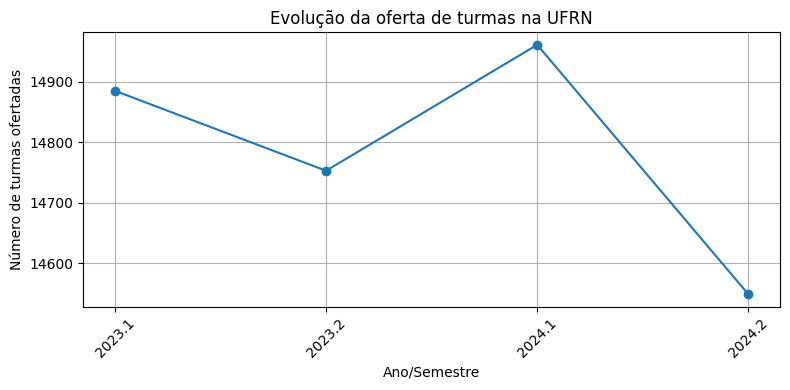

In [23]:
#Como a oferta de turmas da UFRN evoluiu ao longo dos anos?
oferta_por_semestre = df_total.groupby(['ano', 'periodo']).size().reset_index(name='qtd_turmas')

oferta_por_semestre['ano_periodo'] = oferta_por_semestre['ano'].astype(str) + '.' + oferta_por_semestre['periodo'].astype(str)

plt.figure(figsize=(8, 4))
plt.plot(oferta_por_semestre['ano_periodo'], oferta_por_semestre['qtd_turmas'], marker='o')
plt.xlabel('Ano/Semestre')
plt.ylabel('Número de turmas ofertadas')
plt.title('Evolução da oferta de turmas na UFRN')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

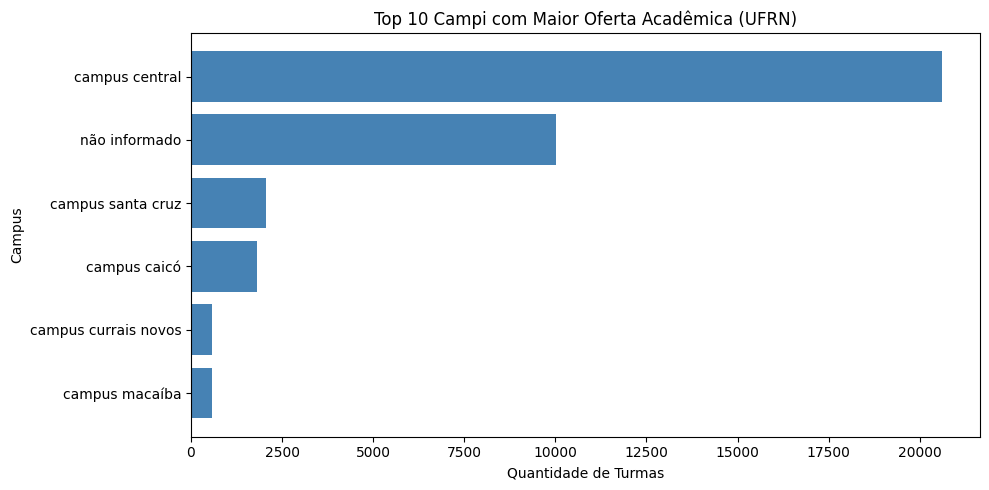

In [24]:
#Quais campi concentram a maior parte da oferta acadêmica?
oferta_por_campus = (df_total.groupby('campus_turma')['id_turma'].nunique().reset_index(name='qtd_turmas').sort_values(by='qtd_turmas', ascending=False))
top10 = oferta_por_campus.head(10)

plt.figure(figsize=(10, 5))
plt.barh(top10['campus_turma'], top10['qtd_turmas'], color='steelblue')
plt.xlabel('Quantidade de Turmas')
plt.ylabel('Campus')
plt.title('Top 10 Campi com Maior Oferta Acadêmica (UFRN)')
plt.gca().invert_yaxis()  # Coloca o maior no topo
plt.tight_layout()
plt.show()

In [25]:
#Existe diferença na capacidade média das turmas entre diferentes níveis de ensino?
media_por_nivel = (df_total.groupby('nivel_ensino')['capacidade_aluno'].mean().reset_index(name='capacidade_media').sort_values(by='capacidade_media', ascending=False))
display(media_por_nivel)

,nivel_ensino,capacidade_media
2,lato sensu,59.325450
1,graduação,25.439258
4,técnico,24.344733
0,formação complementar,20.204969
3,stricto sensu,13.611355


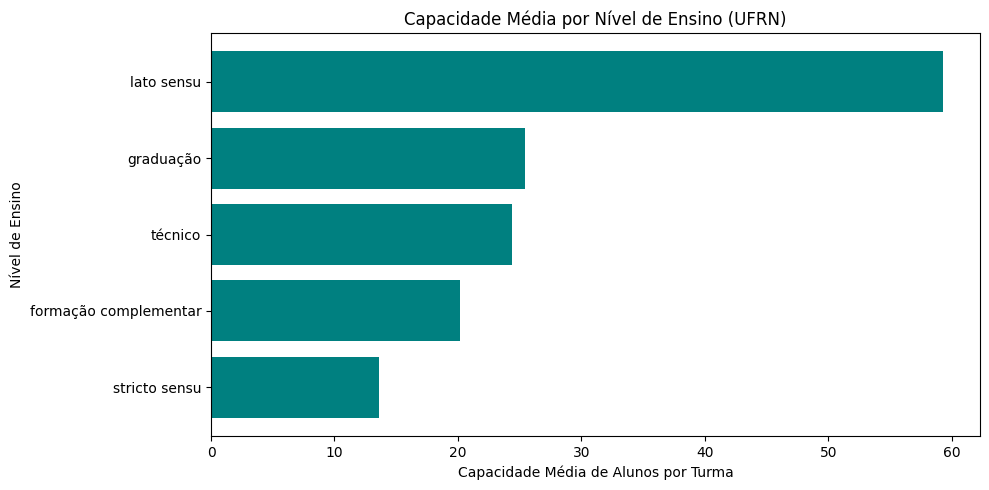

In [26]:
plt.figure(figsize=(10, 5))
plt.barh(media_por_nivel['nivel_ensino'], media_por_nivel['capacidade_media'], color='teal')
plt.xlabel('Capacidade Média de Alunos por Turma')
plt.ylabel('Nível de Ensino')
plt.title('Capacidade Média por Nível de Ensino (UFRN)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [27]:
#Como a modalidade à distância se distribui entre os diferentes campi e níveis?
df_ead = df_total[df_total['distancia'] == True]

In [28]:
ead_por_campus = (df_ead.groupby('campus_turma')['id_turma'].nunique().reset_index(name='turmas_ead').sort_values(by='turmas_ead', ascending=False))
display(ead_por_campus)

,campus_turma,turmas_ead
0,não informado,925


In [29]:
ead_por_nivel = (df_ead.groupby('nivel_ensino')['id_turma'].nunique().reset_index(name='turmas_ead').sort_values(by='turmas_ead', ascending=False))
display(ead_por_nivel)

,nivel_ensino,turmas_ead
0,graduação,646
1,lato sensu,135
3,técnico,117
2,stricto sensu,27


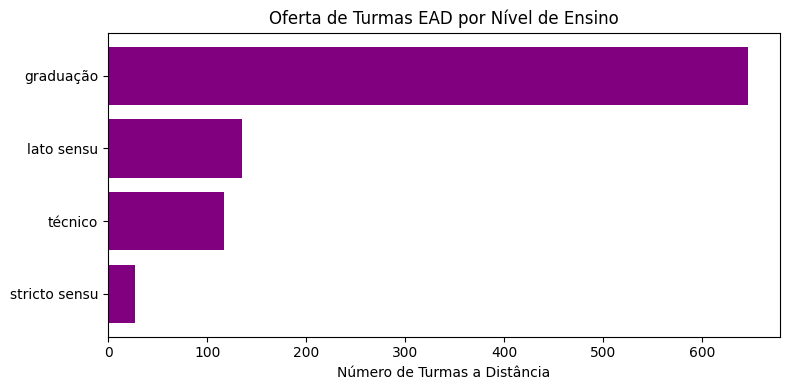

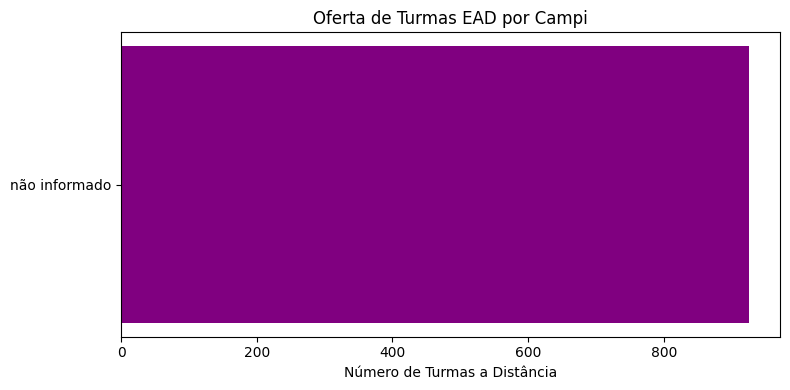

In [30]:
plt.figure(figsize=(8, 4))
plt.barh(ead_por_nivel['nivel_ensino'], ead_por_nivel['turmas_ead'], color='purple')
plt.xlabel('Número de Turmas a Distância')
plt.title('Oferta de Turmas EAD por Nível de Ensino')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.barh(ead_por_campus['campus_turma'], ead_por_campus['turmas_ead'], color='purple')
plt.xlabel('Número de Turmas a Distância')
plt.title('Oferta de Turmas EAD por Campi')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

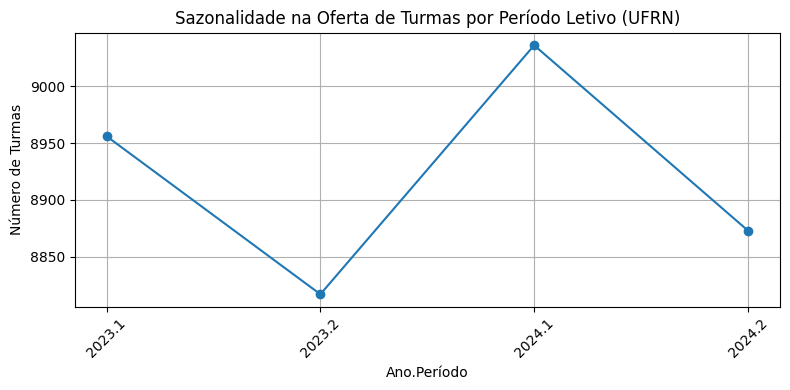

In [31]:
#Há sazonalidade na oferta de turmas entre os períodos letivos?
oferta_por_periodo = (df_total.groupby(['ano', 'periodo'])['id_turma'].nunique().reset_index(name='qtd_turmas').sort_values(['ano', 'periodo']))
oferta_por_periodo['ano_periodo'] = (oferta_por_periodo['ano'].astype(str) + '.' + oferta_por_periodo['periodo'].astype(str))
plt.figure(figsize=(8, 4))
plt.plot(oferta_por_periodo['ano_periodo'], oferta_por_periodo['qtd_turmas'], marker='o')
plt.title('Sazonalidade na Oferta de Turmas por Período Letivo (UFRN)')
plt.xlabel('Ano.Período')
plt.ylabel('Número de Turmas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

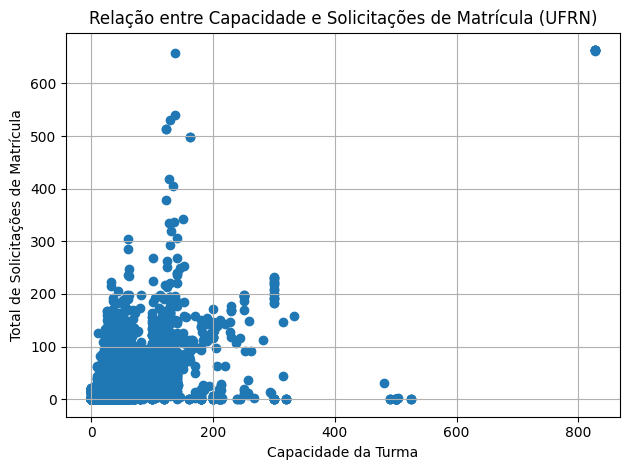

In [32]:
#Qual a relação entre a capacidade das turmas e o número de solicitações de matrícula?
plt.scatter(df_total['capacidade_aluno'], df_total['total_solicitacoes'], marker='o')
plt.xlabel('Capacidade da Turma')
plt.ylabel('Total de Solicitações de Matrícula')
plt.title('Relação entre Capacidade e Solicitações de Matrícula (UFRN)')
plt.grid(True)
plt.tight_layout()
plt.show()

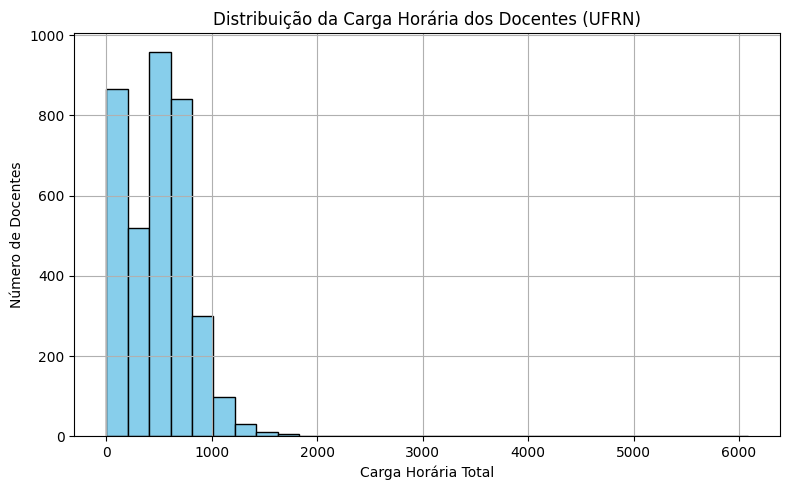

In [33]:
#Existem padrões na carga horária dedicada pelos docentes?
df_docentes = df_total.dropna(subset=['id_docente'])
carga_horaria_por_docente = (df_docentes.groupby('id_docente')['ch_dedicada_periodo'].sum().reset_index(name='carga_horaria_total').sort_values(by='carga_horaria_total', ascending=False))
plt.figure(figsize=(8, 5))
plt.hist(carga_horaria_por_docente['carga_horaria_total'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Carga Horária Total')
plt.ylabel('Número de Docentes')
plt.title('Distribuição da Carga Horária dos Docentes (UFRN)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
#Há diferenças significativas entre turmas presenciais e à distância em termos de capacidade e demanda?
turmas_presenciais = (df_total.groupby([df_total['distancia'] == 'false'])['capacidade_aluno'])

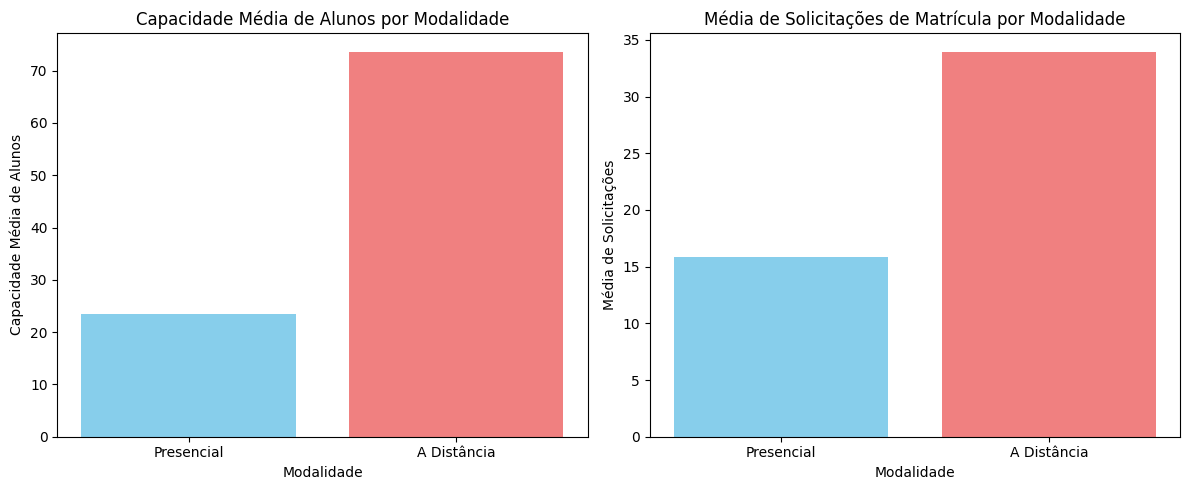

In [35]:
# Comparar capacidade e demanda entre turmas presenciais e a distância
comparacao_modalidades = df_total.groupby('distancia')[['capacidade_aluno', 'total_solicitacoes']].mean().reset_index()

# Renomear a coluna 'distancia' para melhor legibilidade
comparacao_modalidades['distancia'] = comparacao_modalidades['distancia'].map({True: 'A Distância', False: 'Presencial'})

# Criar gráficos para visualização usando plt
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico para Capacidade Média
axes[0].bar(comparacao_modalidades['distancia'], comparacao_modalidades['capacidade_aluno'], color=['skyblue', 'lightcoral'])
axes[0].set_title('Capacidade Média de Alunos por Modalidade')
axes[0].set_xlabel('Modalidade')
axes[0].set_ylabel('Capacidade Média de Alunos')
axes[0].tick_params(axis='x', rotation=0)

# Gráfico para Total de Solicitações Médio
axes[1].bar(comparacao_modalidades['distancia'], comparacao_modalidades['total_solicitacoes'], color=['skyblue', 'lightcoral'])
axes[1].set_title('Média de Solicitações de Matrícula por Modalidade')
axes[1].set_xlabel('Modalidade')
axes[1].set_ylabel('Média de Solicitações')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [36]:
#Dia 3

#Escolha de Variáveis
| Variável              | Tipo       | Justificativa                                                                |
| --------------------- | ---------- | ---------------------------------------------------------------------------- |
| `capacidade_aluno`    | Numérica   | Representa o tamanho máximo da turma                                         |
| `ch_dedicada_periodo` | Numérica   | Mede a carga horária total da turma no período                               |
| `total_solicitacoes`  | Numérica   | Indica a demanda — fundamental para ver desequilíbrios entre oferta/demanda. |
| `distancia`           | Booleana   | Permite distinguir turmas EAD e presenciais — pode criar agrupamentos.       |
| `nivel_ensino`        | Categórica | Permite identificar diferenças entre técnico, graduação, pós etc.            |

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
# Selecionar variáveis para clustering
variaveis = ['capacidade_aluno', 'ch_dedicada_periodo', 'total_solicitacoes', 'distancia', 'nivel_ensino']
df_cluster = df_total[variaveis].copy()


In [39]:
# Separação por tipo
numericas = ['capacidade_aluno', 'ch_dedicada_periodo', 'total_solicitacoes']
booleanas = ['distancia']
categoricas = ['nivel_ensino']

# Escalonamento
scaler = StandardScaler()
dados_numericos = scaler.fit_transform(df_cluster[numericas])

# Codificação One-Hot
encoder = OneHotEncoder(sparse_output=False)
dados_categoricos = encoder.fit_transform(df_cluster[categoricas])

# Concatenando todas as variáveis
X = np.concatenate([
    dados_numericos,
    df_cluster[booleanas].astype(int).values,
    dados_categoricos
], axis=1)


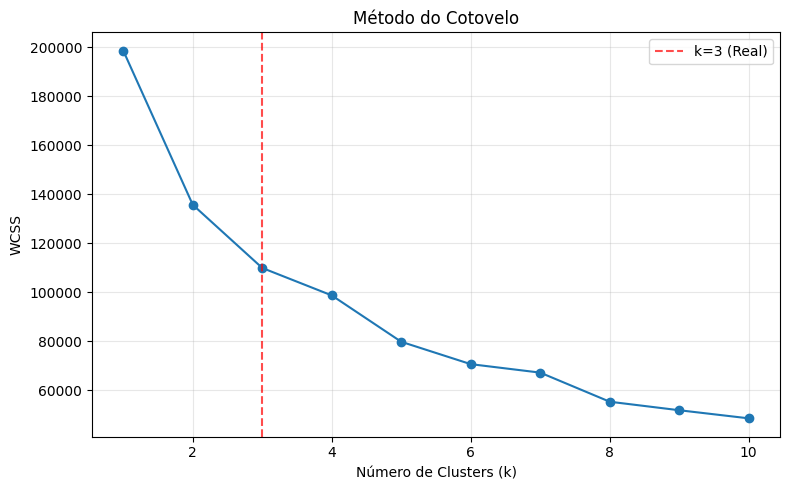

In [40]:
# Encontrar o número ideal de clusters usando o Método do Cotovelo
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot do cotovelo
plt.figure(figsize=(8,5))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método do Cotovelo')
plt.grid(True, alpha=0.3)

plt.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='k=3 (Real)')
plt.legend()
plt.tight_layout()
plt.show()


In [41]:
# Defina o valor de k com base no gráfico (exemplo: k = 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

# Adiciona os rótulos de cluster ao DataFrame original
df_cluster['cluster'] = clusters


In [42]:
# Estatísticas descritivas por cluster
df_analise = df_cluster.copy()
df_analise['cluster'] = df_analise['cluster'].astype(str)

agrupado = df_analise.groupby('cluster').agg({
    'capacidade_aluno': 'mean',
    'ch_dedicada_periodo': 'mean',
    'total_solicitacoes': 'mean',
    'distancia': 'mean'
})

display(agrupado)


,capacidade_aluno,ch_dedicada_periodo,total_solicitacoes,distancia
cluster,,,,
0,58.352972,38.716880,50.842860,0.041065
1,12.595388,14.249658,7.630659,0.008869
2,29.187388,59.881513,13.292333,0.022038


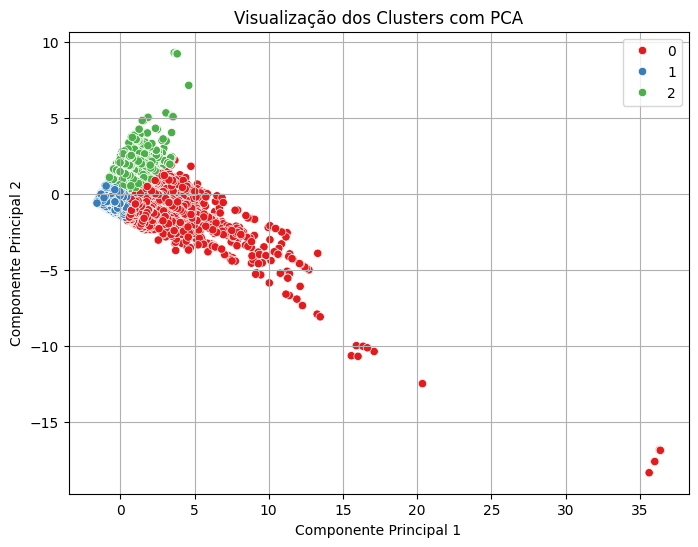

In [43]:
# Redução de dimensionalidade com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot dos clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set1')
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


In [44]:
agrupado = df_analise.groupby('cluster').agg({
    'capacidade_aluno': 'mean',
    'ch_dedicada_periodo': 'mean',
    'total_solicitacoes': 'mean',
    'distancia': 'mean'
})

display(agrupado)


,capacidade_aluno,ch_dedicada_periodo,total_solicitacoes,distancia
cluster,,,,
0,58.352972,38.716880,50.842860,0.041065
1,12.595388,14.249658,7.630659,0.008869
2,29.187388,59.881513,13.292333,0.022038


In [45]:
# Função para gerar persona com base nas médias
def gerar_persona(cluster_id, capacidade, carga_horaria, solicitacoes, distancia):
    descricao = f"📌 **Cluster {cluster_id}**\n"

    # Capacidade
    if capacidade > 50:
        descricao += "- Turmas grandes (capacidade média alta)\n"
    elif capacidade < 20:
        descricao += "- Turmas pequenas\n"
    else:
        descricao += "- Turmas de tamanho médio\n"

    # Carga horária
    if carga_horaria > 50:
        descricao += "- Alta carga horária\n"
    elif carga_horaria < 20:
        descricao += "- Baixa carga horária\n"
    else:
        descricao += "- Carga horária intermediária\n"

    # Solicitações
    if solicitacoes > 40:
        descricao += "- Muito procuradas (alta demanda)\n"
    elif solicitacoes < 15:
        descricao += "- Pouco procuradas (baixa demanda)\n"
    else:
        descricao += "- Demanda moderada\n"

    # Distância
    if distancia > 0.5:
        descricao += "- Predominantemente EAD\n"
    else:
        descricao += "- Predominantemente presenciais\n"

    return descricao

# Aplicar nos clusters
for cluster_id, row in agrupado.iterrows():
    persona = gerar_persona(cluster_id,
                            row['capacidade_aluno'],
                            row['ch_dedicada_periodo'],
                            row['total_solicitacoes'],
                            row['distancia'])
    print(persona + "\n" + "-"*40 + "\n")


📌 **Cluster 0**
- Turmas grandes (capacidade média alta)
- Carga horária intermediária
- Muito procuradas (alta demanda)
- Predominantemente presenciais

----------------------------------------

📌 **Cluster 1**
- Turmas pequenas
- Baixa carga horária
- Pouco procuradas (baixa demanda)
- Predominantemente presenciais

----------------------------------------

📌 **Cluster 2**
- Turmas de tamanho médio
- Alta carga horária
- Pouco procuradas (baixa demanda)
- Predominantemente presenciais

----------------------------------------



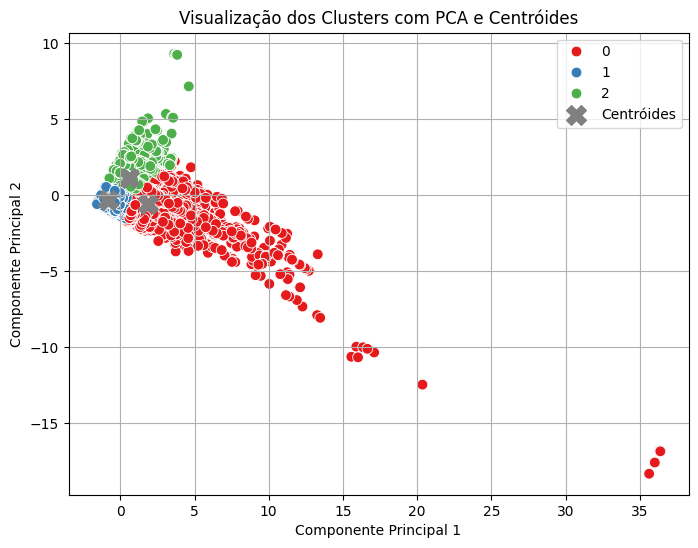

In [46]:
centroides = kmeans.cluster_centers_  # Matriz (k x n_features)
X_pca = pca.fit_transform(X)
centroides_pca = pca.transform(centroides)  # mesma transformação usada para X
# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set1', s=60)

# Plot centróides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            s=200, c='gray', marker='X', label='Centróides')

plt.title('Visualização dos Clusters com PCA e Centróides')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()


##Dia 4

In [47]:
# Day_4_Testes_e_Hipoteses.ipynb — célula: testes
import pandas as pd
import numpy as np
from scipy import stats

# 1) leitura (ajuste o caminho se necessário)


# 2) conversões numéricas (tolerante a erros)
for c in ['capacidade_aluno','ch_dedicada_periodo','total_solicitacoes','qtd_aulas_lancadas']:
    if c in df_total.columns:
        df_total[c] = pd.to_numeric(df_total[c], errors='coerce')

# 3) inspeção rápida
print("Linhas:", len(df_total))
print("Colunas importantes presentes:", [c for c in ['capacidade_aluno','modalidade_participantes','nivel_ensino','total_solicitacoes','qtd_aulas_lancadas'] if c in df_total.columns])

# ---------- HIPOSE A: Presencial vs EaD (capacidade_aluno) ----------
# Filtrar grupos
mod = df_total['modalidade_participantes'].astype(str).str.lower()
pres_mask = mod.str.contains('pres', na=False)
ead_mask = mod.str.contains('ead|dist', na=False)

grupo_pres = df_total.loc[pres_mask, 'capacidade_aluno'].dropna()
grupo_ead = df_total.loc[ead_mask, 'capacidade_aluno'].dropna()

print(f"\nHipótese A: N pres={len(grupo_pres)}, N ead={len(grupo_ead)}")
print("Médias:", grupo_pres.mean(), grupo_ead.mean())
# Estatísticas descritivas
desc = pd.DataFrame({
    'pres': [grupo_pres.count(), grupo_pres.mean(), grupo_pres.std(), grupo_pres.median()],
    'ead' : [grupo_ead.count(), grupo_ead.mean(), grupo_ead.std(), grupo_ead.median()]
}, index=['n','mean','std','median'])
print(desc)

# Teste de normalidade em subamostras (opcional — grandes amostras tornam Shapiro sensível)
def try_shapiro(series):
    if len(series) >= 3 and len(series) <= 5000:
        return stats.shapiro(series)
    elif len(series) > 5000:
        s = series.sample(500, random_state=42)
        return stats.shapiro(s)
    else:
        return None

sh_pres = try_shapiro(grupo_pres)
sh_ead = try_shapiro(grupo_ead)
print("Shapiro pres (stat,p):", sh_pres)
print("Shapiro ead (stat,p):", sh_ead)

# t-test de Welch (independente, não assume variância igual)
t_stat, p_val = stats.ttest_ind(grupo_pres, grupo_ead, equal_var=False, nan_policy='omit')
print("t-statistic:", t_stat, "p-value:", p_val)

# Se desejar a alternativa não-paramétrica:
try:
    u_stat, u_p = stats.mannwhitneyu(grupo_pres, grupo_ead, alternative='two-sided')
    print("Mann-Whitney U:", u_stat, "p-value:", u_p)
except Exception as e:
    print("Mann-Whitney erro:", e)

# ---------- HIPOSE B: Graduação vs Pós (total_solicitacoes) ----------
nivel = df_total['nivel_ensino'].astype(str).str.lower()
grad_mask = nivel.str.contains('grad', na=False)
pos_mask = nivel.str.contains('pos|pós|pos-grad', na=False)

grupo_grad = df_total.loc[grad_mask, 'total_solicitacoes'].dropna()
grupo_pos = df_total.loc[pos_mask, 'total_solicitacoes'].dropna()

print(f"\nHipótese B: N grad={len(grupo_grad)}, N pos={len(grupo_pos)}")
print("Médias:", grupo_grad.mean(), grupo_pos.mean())
print("Skewness:", grupo_grad.skew(), grupo_pos.skew())

# Mann-Whitney (mais robusto a não normalidade)
if len(grupo_grad) > 0 and len(grupo_pos) > 0:
    u_stat, p_u = stats.mannwhitneyu(grupo_grad, grupo_pos, alternative='two-sided')
    print("Mann-Whitney U:", u_stat, "p-value:", p_u)
else:
    print("Amostras insuficientes para Mann-Whitney.")

# ---------- HIPOSE C: Correlação qtd_aulas_lancadas x total_solicitacoes ----------
common = df_total[['qtd_aulas_lancadas','total_solicitacoes']].dropna()
print(f"\nHipótese C: pares n={len(common)}")
if len(common) > 1:
    pearson_r, pearson_p = stats.pearsonr(common['qtd_aulas_lancadas'], common['total_solicitacoes'])
    spearman = stats.spearmanr(common['qtd_aulas_lancadas'], common['total_solicitacoes'])
    print("Pearson r:", pearson_r, "p:", pearson_p)
    # Spearman retorna NamedTuple em versões recentes
    spearman_rho = spearman.correlation if hasattr(spearman,'correlation') else spearman[0]
    spearman_pv  = spearman.pvalue     if hasattr(spearman,'pvalue') else spearman[1]
    print("Spearman rho:", spearman_rho, "p:", spearman_pv)
else:
    print("Pares insuficientes para correlação.")

# ---------- Salvar resultados resumidos ----------
res = {
    'hipotese_A': {'t_stat': float(t_stat) if 't_stat' in locals() else None, 'p_value': float(p_val) if 'p_val' in locals() else None},
    'hipotese_B': {'u_stat': float(u_stat) if 'u_stat' in locals() else None, 'p_value': float(p_u) if 'p_u' in locals() else None},
    'hipotese_C': {'pearson_r': float(pearson_r) if 'pearson_r' in locals() else None, 'pearson_p': float(pearson_p) if 'pearson_p' in locals() else None}
}
print(res)

Linhas: 59148
Colunas importantes presentes: ['capacidade_aluno', 'modalidade_participantes', 'nivel_ensino', 'total_solicitacoes', 'qtd_aulas_lancadas']

Hipótese A: N pres=58116, N ead=1032
Médias: 23.443182600316607 73.65213178294573
                pres          ead
n       58116.000000  1032.000000
mean       23.443183    73.652132
std        24.573324   103.923394
median     17.000000    30.000000
Shapiro pres (stat,p): ShapiroResult(statistic=np.float64(0.41332095110466727), pvalue=np.float64(2.798154347319338e-37))
Shapiro ead (stat,p): ShapiroResult(statistic=np.float64(0.6889614864916809), pvalue=np.float64(7.368660607889887e-40))
t-statistic: -15.512870579114997 p-value: 6.014598527639204e-49
Mann-Whitney U: 24425652.0 p-value: 1.3125421510591476e-24

Hipótese B: N grad=47282, N pos=0
Médias: 18.611585804323 nan
Skewness: 4.781143058496298 nan
Amostras insuficientes para Mann-Whitney.

Hipótese C: pares n=59148
Pearson r: -0.10004519831745765 p: 2.0766637969375993e-131
Spear

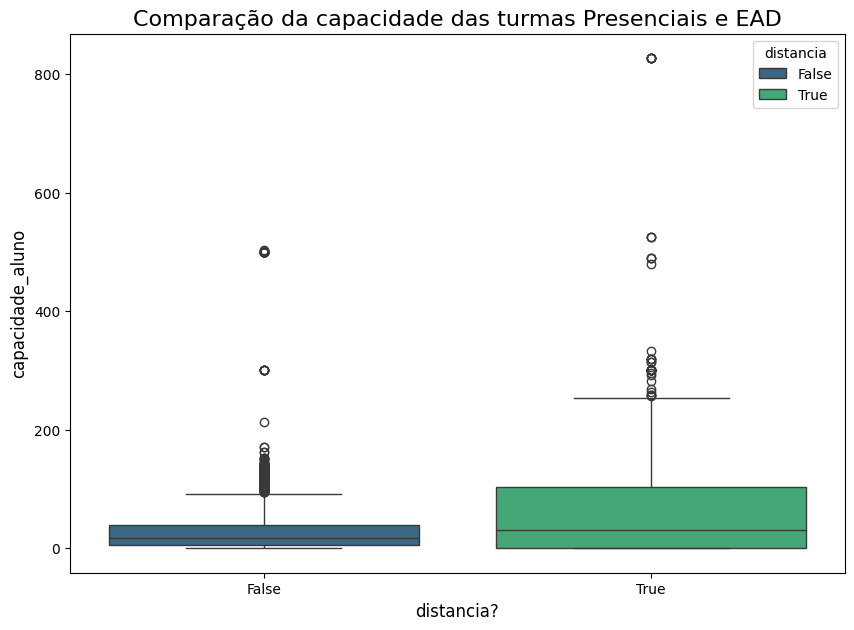

--- Teste t (Comparação de Médias) ---
Estatística t: 57.1585
P-valor do Teste t: 0.0000
Resultado: Rejeitamos a hipótese nula (H0). A diferença nas MÉDIAS de CRA é estatisticamente significativa.

--- Teste de Mann-Whitney U (Comparação de Distribuições) ---
Estatística U: 35650140.5000
P-valor do Teste de Mann-Whitney (Bilateral): 0.0000
Resultado: Rejeitamos a hipótese nula (H0). Existe uma diferença estatisticamente significativa entre as DISTRIBUIÇÕES de CRA dos dois grupos.


In [48]:
# --- Análise Visual ---
plt.figure(figsize=(10, 7))
sns.boxplot(data=df_total, x='distancia', y='capacidade_aluno', hue='distancia', palette='viridis')
plt.title('Comparação da capacidade das turmas Presenciais e EAD', fontsize=16)
plt.xlabel('distancia?', fontsize=12)
plt.ylabel('capacidade_aluno', fontsize=12)
plt.show()

# Separar as amostras para os testes
bolsistas = df_total[df_total['distancia'] == True]['capacidade_aluno']
nao_bolsistas = df_total[df_total['distancia'] == False]['capacidade_aluno']
alpha = 0.05

#---------------------------------------------------
# Teste 1: Teste t para amostras independentes (Paramétrico)
#---------------------------------------------------
print("--- Teste t (Comparação de Médias) ---")
# H0: As médias de CRA são iguais.
# Ha: As médias de CRA são diferentes.
t_stat, p_valor_t = stats.ttest_ind(bolsistas, nao_bolsistas)

print(f"Estatística t: {t_stat:.4f}")
print(f"P-valor do Teste t: {p_valor_t:.4f}")

if p_valor_t < alpha:
    print("Resultado: Rejeitamos a hipótese nula (H0). A diferença nas MÉDIAS de CRA é estatisticamente significativa.\n")
else:
    print("Resultado: Falhamos em rejeitar a hipótese nula (H0). Não há evidência de diferença significativa nas MÉDIAS de CRA.\n")

#-----------------------------------------------------------
# Teste 2: Teste de Mann-Whitney U (Não-Paramétrico) - TESTE BILATERAL (TWO-SIDED)
#-----------------------------------------------------------
print("--- Teste de Mann-Whitney U (Comparação de Distribuições) ---")
# H0: As distribuições de CRA são iguais para os dois grupos.
# Ha: As distribuições de CRA são DIFERENTES entre os dois grupos.
u_stat, p_valor_mw = stats.mannwhitneyu(bolsistas, nao_bolsistas, alternative='two-sided') # 'two-sided' é o padrão

print(f"Estatística U: {u_stat:.4f}")
print(f"P-valor do Teste de Mann-Whitney (Bilateral): {p_valor_mw:.4f}")

if p_valor_mw < alpha:
    print("Resultado: Rejeitamos a hipótese nula (H0). Existe uma diferença estatisticamente significativa entre as DISTRIBUIÇÕES de CRA dos dois grupos.")
else:
    print("Resultado: Falhamos em rejeitar a hipótese nula (H0). Não há evidência de uma diferença significativa entre as DISTRIBUIÇÕES de CRA dos dois grupos.")

In [49]:
df_total.columns

Index(['id_turma', 'codigo_turma', 'id_componente_curricular',
       'ch_dedicada_periodo', 'nivel_ensino', 'campus_turma', 'local', 'ano',
       'periodo', 'data_inicio', 'data_fim', 'descricao_horario',
       'total_solicitacoes', 'capacidade_aluno', 'tipo', 'distancia',
       'data_consolidacao', 'qtd_aulas_lancadas', 'situacao_turma',
       'modalidade_participantes', 'id_docente', 'docente_interno'],
      dtype='object')

##Dia 4
Vou usar o csv criado nos comandos anteriores nessa parte


In [50]:
import pandas as pd

# Leitura do arquivo CSV tratado
df = pd.read_csv("turmas_tratadas.csv", delimiter=";")

# Exibir informações iniciais
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59148 entries, 0 to 59147
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id_turma                  59148 non-null  int64 
 1   codigo_turma              59148 non-null  object
 2   id_componente_curricular  59148 non-null  int64 
 3   ch_dedicada_periodo       59148 non-null  int64 
 4   nivel_ensino              59148 non-null  object
 5   campus_turma              59148 non-null  object
 6   local                     59148 non-null  object
 7   ano                       59148 non-null  int64 
 8   periodo                   59148 non-null  int64 
 9   data_inicio               59148 non-null  object
 10  data_fim                  59148 non-null  object
 11  descricao_horario         59148 non-null  object
 12  total_solicitacoes        59148 non-null  int64 
 13  capacidade_aluno          59148 non-null  int64 
 14  tipo                  

,id_turma,codigo_turma,id_componente_curricular,ch_dedicada_periodo,nivel_ensino,campus_turma,local,ano,periodo,data_inicio,data_fim,descricao_horario,total_solicitacoes,capacidade_aluno,tipo,distancia,data_consolidacao,qtd_aulas_lancadas,situacao_turma,modalidade_participantes,id_docente,docente_interno
0,57711864,01,69258,15,técnico,não informado,Sala 03,2023,1,2023-02-27,2023-07-01,4T4 (27/02/2023 - 01/07/2023),0,1,regular,False,2023-07-21 10:59:04.285,0,consolidada,Presencial,1174208,True
1,57711865,02,69258,15,técnico,não informado,Sala 03,2023,1,2023-02-27,2023-07-01,2T3 (27/02/2023 - 01/07/2023),0,1,regular,False,2023-07-21 10:53:20.671,13,consolidada,Presencial,1174208,True
2,57711866,03,69258,15,técnico,não informado,Sala E,2023,1,2023-02-27,2023-07-01,6T4 (27/02/2023 - 01/07/2023),0,1,regular,False,2023-07-21 10:57:36.425,11,consolidada,Presencial,1174208,True
3,57711867,01,69289,15,técnico,não informado,Sala 13,2023,1,2023-02-27,2023-07-01,3T1 (27/02/2023 - 01/07/2023),0,1,regular,False,2023-07-10 09:14:34.285,18,consolidada,Presencial,1812476,True
4,57711868,02,69289,15,técnico,não informado,Sala 13,2023,1,2023-02-27,2023-07-01,3T2 (27/02/2023 - 01/07/2023),0,1,regular,False,2023-07-10 09:13:43.535,18,consolidada,Presencial,1812476,True


## Formulação das Hipóteses

**Hipótese 1 (H1):** A média da capacidade de alunos por turma mudou significativamente ao longo dos anos.

- H0: A média é igual em todos os anos.
- H1: Existe diferença significativa em pelo menos um ano.

**Hipótese 2 (H2):** Há diferença significativa no total de solicitações entre períodos (matutino, vespertino, noturno).

- H0: A média de solicitações é igual entre os períodos.
- H1: Pelo menos um período tem média diferente.

**Hipótese 3 (H3):** A relação entre capacidade de alunos e total de solicitações é positiva.

- H0: Não há correlação.
- H1: Existe correlação positiva significativa.


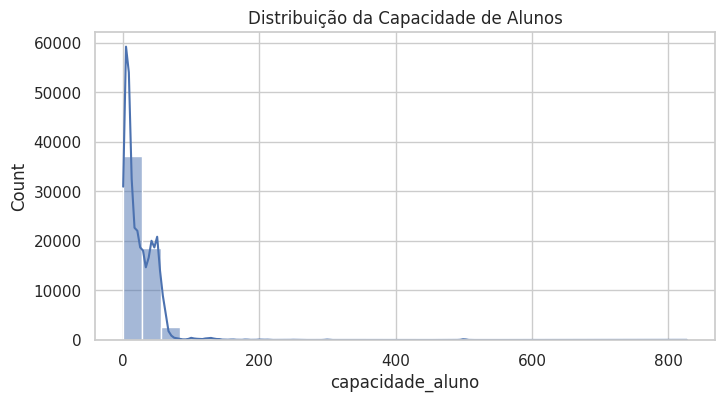

In [51]:
# Ajustar estilo dos gráficos
sns.set(style="whitegrid")

# Histograma de capacidade de alunos
plt.figure(figsize=(8,4))
sns.histplot(df['capacidade_aluno'], bins=30, kde=True)
plt.title("Distribuição da Capacidade de Alunos")
plt.show()

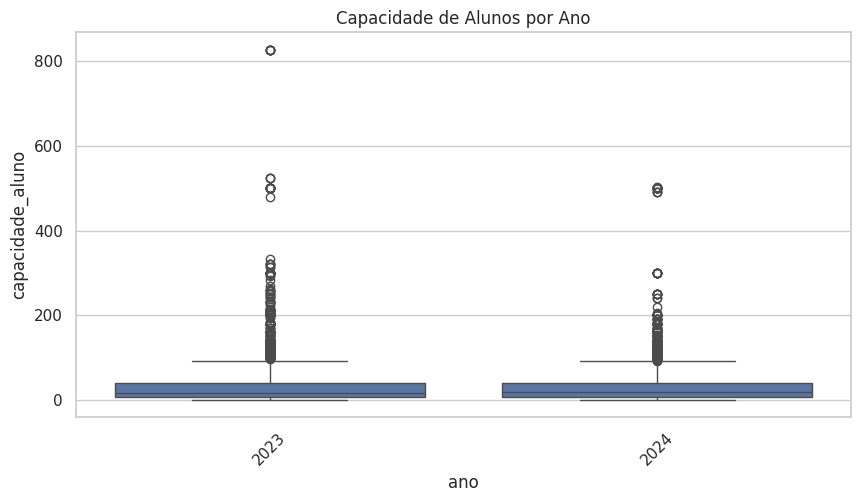

In [52]:
# Boxplot por ano
plt.figure(figsize=(10,5))
sns.boxplot(x='ano', y='capacidade_aluno', data=df)
plt.title("Capacidade de Alunos por Ano")
plt.xticks(rotation=45)
plt.show()

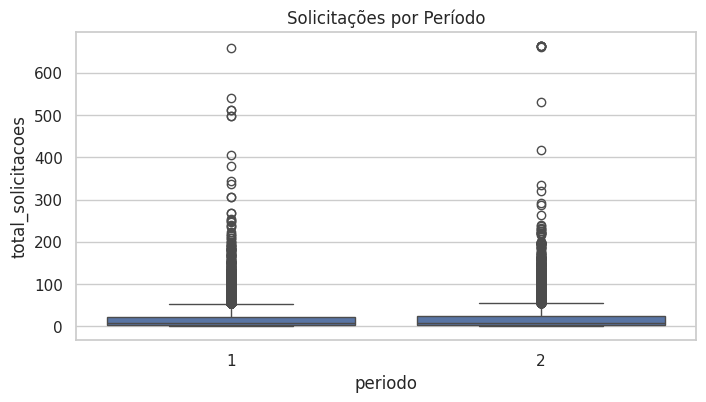

In [53]:
# Boxplot de solicitações por período
plt.figure(figsize=(8,4))
sns.boxplot(x='periodo', y='total_solicitacoes', data=df)
plt.title("Solicitações por Período")
plt.show()

In [54]:
from scipy import stats

# --- Teste 1: ANOVA para capacidade_aluno por ano ---
anos = [grupo["capacidade_aluno"].dropna() for nome, grupo in df.groupby("ano")]
anova_capacidade = stats.f_oneway(*anos)
print("ANOVA capacidade por ano:", anova_capacidade)

# --- Teste 2: ANOVA para total_solicitacoes por periodo ---
periodos = [grupo["total_solicitacoes"].dropna() for nome, grupo in df.groupby("periodo")]
anova_solicitacoes = stats.f_oneway(*periodos)
print("ANOVA solicitações por período:", anova_solicitacoes)

# --- Teste 3: Correlação capacidade x solicitações ---
corr, pval = stats.pearsonr(df["capacidade_aluno"].dropna(), df["total_solicitacoes"].dropna())
print(f"Correlação: {corr:.3f}, p-valor: {pval:.5f}")


ANOVA capacidade por ano: F_onewayResult(statistic=np.float64(0.5424277827110017), pvalue=np.float64(0.46143123363609784))
ANOVA solicitações por período: F_onewayResult(statistic=np.float64(5.160186265312038), pvalue=np.float64(0.023113994470428143))
Correlação: 0.566, p-valor: 0.00000


## Interpretação dos Resultados

- **Teste 1 (Capacidade x Ano)**: Se p-valor < 0.05, rejeita-se H0 e conclui-se que há diferença significativa na capacidade média entre anos.
- **Teste 2 (Solicitações x Período)**: Se p-valor < 0.05, rejeita-se H0 e conclui-se que há diferença significativa entre períodos.
- **Teste 3 (Correlação)**: Se p-valor < 0.05 e a correlação for positiva, há evidência de relação direta entre capacidade e solicitações.


## Conclusão Final

1) ANOVA capacidade por ano

Estatística F ≈ 0,54, p-valor ≈ 0,46 → Não há diferença estatisticamente significativa na capacidade média das turmas entre os anos analisados (nível de significância de 5%).

Em termos práticos: a capacidade média não varia de forma relevante ao longo dos anos.

2) ANOVA solicitações por período

Estatística F ≈ 5,16, p-valor ≈ 0,023 → Diferença estatisticamente significativa nas solicitações médias entre períodos.

Isso sugere que a demanda por turmas varia conforme o período (por exemplo, semestre ou trimestre).

3) Correlação (Pearson)

r ≈ 0,566, p-valor ≈ 0,000 → Correlação moderada e positiva entre as variáveis analisadas.

Interpretação: quando uma variável aumenta, a outra tende a aumentar também, e essa relação é estatisticamente significativa..
